perceptronは線形分離可能な問題しか解けない。<br>
間違いの数に応じて誤差が決まる→どうやっても間違いが生まれる問題は境界が行ったり来たりするだけで収束しない

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris
iris=load_iris()

In [7]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
columns=iris.feature_names

In [12]:
data=iris.data
target=iris.target

In [14]:
iris_data=pd.DataFrame(iris.data,columns=columns)

In [15]:
iris_target=pd.DataFrame(target,columns=['species'])

In [16]:
iris_df=pd.concat([iris_data,iris_target],axis=1)

In [18]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
import seaborn as sns

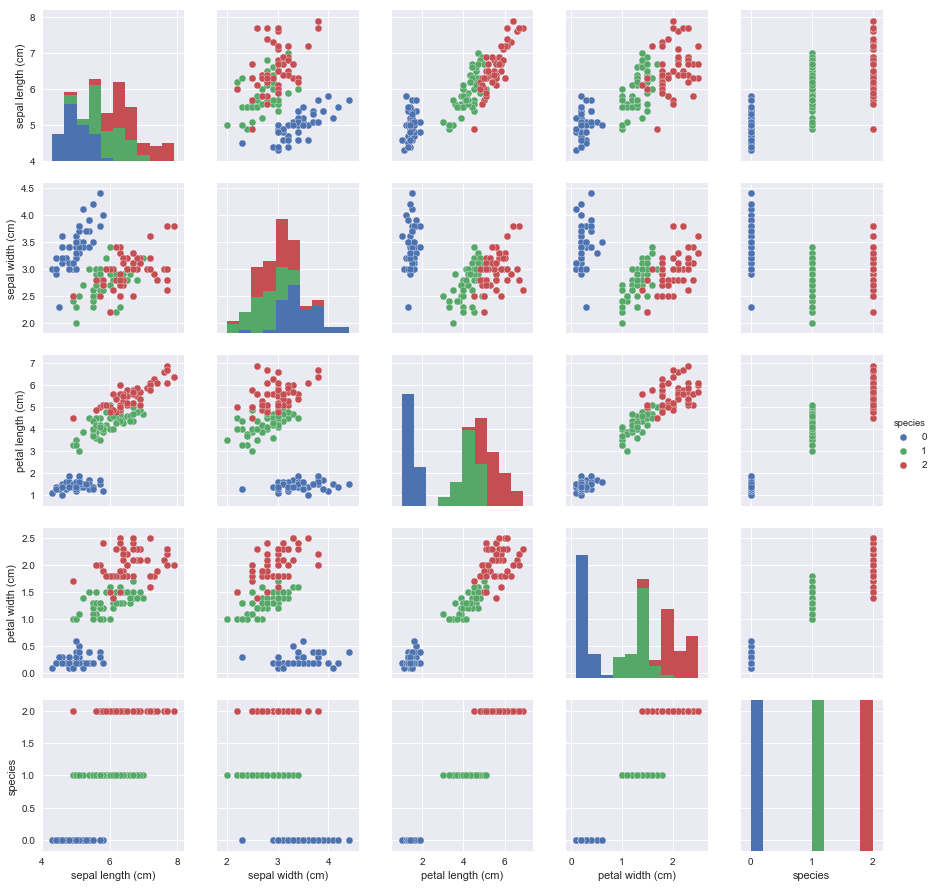

In [21]:
sns.pairplot(iris_df,hue='species')
plt.show()

分類問題の時は基本的に標準化を行う。変数のスケールを同じにするべき。スケールの小さい変数が軽視されないように。

In [38]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(iris_data.values)
X_std=std.transform(iris_data.values)

In [51]:
# 特徴選択
# setosaとversicolorの､petal lengthとpetal widthを選択
X_1 = X_std[0:100, [2, 3]]
y_1 = iris.target[:100]

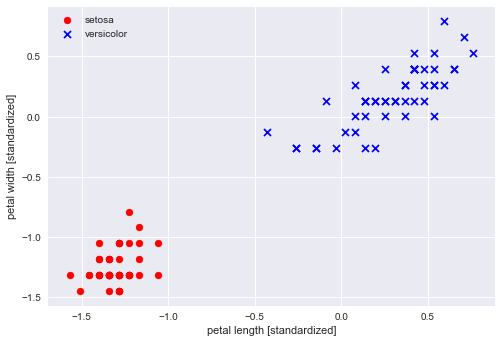

In [52]:
# 散布図を出力
plt.scatter(X_std[:50, 2], X_std[:50,3], color="red", marker="o", label="setosa") # settosaのプロット
plt.scatter(X_std[50:100, 2], X_std[50:100, 3],color="blue", marker="x",label="versicolor") # versicolorのプロット
plt.xlabel("petal length [standardized]") # 横軸の表示を設定
plt.ylabel("petal width [standardized]")  # 縦軸の表示を設定
plt.legend(loc="upper left") # 左上に凡例を表示
plt.show()

In [53]:
from sklearn.cross_validation import train_test_split
X_1_train,X_1_test,y_1_train,y_1_test=train_test_split(X_1,y_1,test_size=0.3,random_state=0)

In [54]:
#パーセプトロンを用意して学習 入力に対する線型結合であり出力が0か１になっているので　linear_modelの一つ
from sklearn.linear_model import Perceptron
percep=Perceptron(eta0=0.1)
percep.fit(X_1_train,y_1_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [56]:
# ２次元データの決定曲線をプロットする関数
# (X, y, 分類器)
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

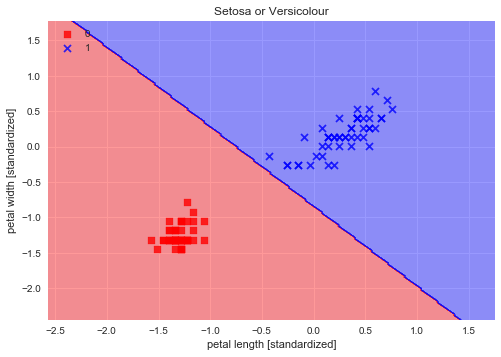

In [58]:
# 散布図上に決定曲線を出力
plot_decision_regions(X_1, y_1, percep)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.title('Setosa or Versicolour')
plt.show()

In [59]:
# 正答率を出力
print('train acc: %.3f' % percep.score(X_1_train, y_1_train))
print('test acc: %.3f' % percep.score(X_1_test, y_1_test))

train acc: 1.000
test acc: 1.000


In [66]:
# testデータのindexを指定
# 0 <= index <= 29
index = 28

# 正解と予測のクラスラベルを出力
print('answer : %d' % y_1_test[index])
print('predict: %d' % percep.predict(X_1_test[index].reshape(1, -1)))

answer : 1
predict: 1


In [64]:
# tips
# 配列の総要素数が不明の場合は，大きさが不明な次元で -1 を指定すると適切な値が自動的に設定されます．
# 上のセルでは２次元配列を作っている。
#  model.predict(x) :xは2次元配列である必要がある。
print(X_1_test[index].reshape(1, -1))
print(X_1_test[index])

[[ 0.08037019  0.00175297]]
[ 0.08037019  0.00175297]


## 多クラス分類

In [68]:
# versinica含むすべてのサンプルを選択
# sepal lengthとpetal lengthを利用
X_2 = X_std[:,[2, 3]]
y_2 = iris.target

In [69]:
# データの分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [70]:
# パーセプトロンの学習
from sklearn.linear_model import Perceptron
ppn_2 = Perceptron(eta0=0.1)
ppn_2.fit(X_2_train, y_2_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

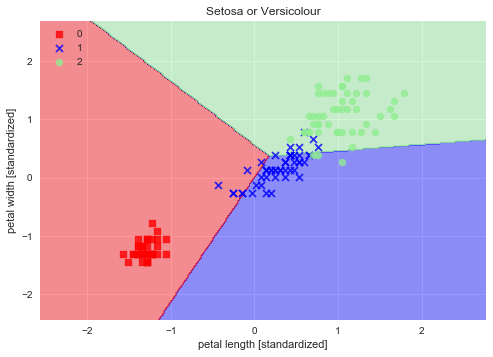

In [71]:
# 散布図上に決定曲線を出力
plot_decision_regions(X_2, y_2, ppn_2)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.title('Setosa or Versicolour')
plt.show()

In [73]:
# 正答率を出力
print('train acc: %.3f' % ppn_2.score(X_2_train, y_2_train))
print('test acc: %.3f' % ppn_2.score(X_2_test, y_2_test))

train acc: 0.895
test acc: 0.889


In [80]:
# testデータのindexを指定
# 0 <= index <= 44
# .predictは複数のデータ入力を前提としているのでreshapeが必要
index = 35
index2=40

# 正解と予測のクラスラベルを出力
print( y_2_test[index:index2])
print( ppn_2.predict(X_2_test[index:index2]))

[1 0 1 1 1]
[0 0 2 2 1]


In [78]:
X_2_test[index:index2]

array([[ 0.08037019,  0.26469891],
       [-1.17067529, -1.18150376],
       [ 0.76275864,  0.52764485],
       [ 0.25096731,  0.39617188],
       [ 0.1372359 ,  0.00175297]])